<a href="https://colab.research.google.com/github/digipodium/data-analytics-workshop-demo-2024/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dputils

In [2]:
url = "https://digipodium.com/mining-demo.html"

In [3]:
from dputils.scrape import Scraper, Tag

In [4]:
scr = Scraper(url)

Selecting a random User-Agent...
Randomly picked browser: Firefox
Randomly picked operating system: Linux
🌐🌐🌐🌐🌐🌐🌐🌐🌐🌐
User agent:  {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:94.0) Gecko/20100101 Firefox/94.0'}
Cookies:  {'session-id': '', 'session-id-time': '', 'session-token': ''}
url:  https://digipodium.com/mining-demo.html
🌐🌐🌐🌐🌐🌐🌐🌐🌐🌐


In [11]:
result = scr.get_repeating_page_data(
    target=Tag(cls='item-list'),
    items=Tag(cls="card"),
    title = Tag('h4'),
    price = Tag('h1', cls="pricing-card-title"),
    oprice = Tag('li', cls='o-price')
)

In [12]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.DataFrame(result)
df

In [ ]:
df.price = df.price.apply(lambda p:p[1:]).astype(float)
df

In [ ]:
df.oprice = df.oprice.apply(lambda p:p[1:]).astype(float)
df

<Axes: xlabel='oprice', ylabel='price'>

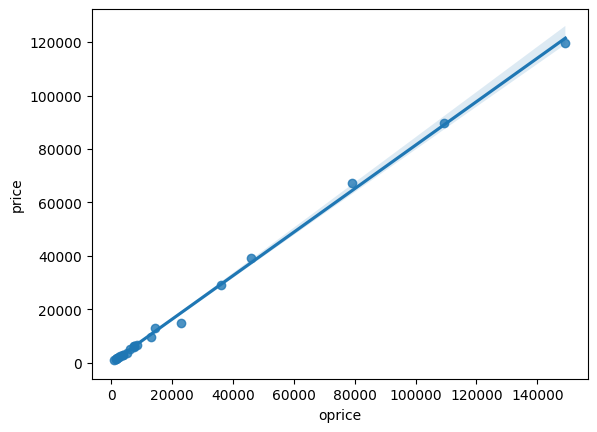

In [18]:
sns.regplot(data=df, x='oprice', y='price')